In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_original = pd.read_csv("./Country-data.csv")
df = df_original.copy()
df = df.iloc[:, 1:]
df = df.dropna()

df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
# Min-Max Scaling
#scaler = MinMaxScaler()
#df = scaler.fit_transform(df)

# Applying the Log
df = df.apply(lambda x: np.log(x))
df = df.dropna()

df.head()

/Users/rakibul/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4.502029,2.302585,2.025513,3.804438,7.383989,2.244956,4.028917,1.761300,6.315358
1,2.809403,3.332205,1.879465,3.883624,9.203316,1.501853,4.334673,0.500775,8.316300
2,3.306887,3.648057,1.427916,3.446808,9.464983,2.778819,4.337291,1.061257,8.402904
3,4.779123,4.131961,1.047319,3.758872,8.682708,3.109061,4.096010,1.818077,8.169053
4,2.332144,3.817712,1.796747,4.075841,9.857444,0.364643,4.341205,0.756122,9.409191


In [4]:
clustering = DBSCAN(eps=1, min_samples=5).fit(df)

In [5]:
clustering.labels_

array([ 2,  0,  0, -1,  0, -1,  0,  1,  1,  0, -1,  0, -1, -1,  1, -1, -1,
        0,  0,  0, -1, -1, -1,  0,  2, -1, -1, -1,  1, -1, -1,  2,  3,  0,
        0,  2, -1, -1,  3, -1,  0, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,
        1,  1, -1,  2,  0,  1,  0,  1, -1,  0,  2,  2,  0, -1,  0, -1,  0,
        0, -1,  0,  1,  1,  0,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1,
        0, -1,  0,  2,  2, -1,  0,  2, -1,  0,  0, -1, -1, -1,  0, -1,  2,
       -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  1, -1,
        3, -1,  2, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  0,  0,  0,
        1, -1,  2,  2,  0, -1, -1, -1,  0,  3, -1,  2,  0, -1,  1, -1,  3,
        0, -1, -1, -1,  0,  0])

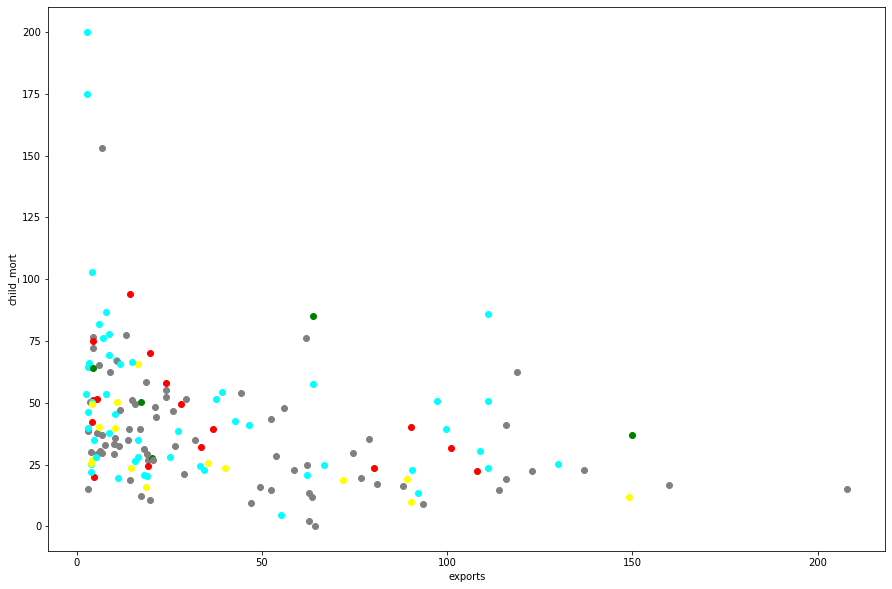

In [6]:
colors = ["cyan", "red", "yellow", "green", "blue", "purple", "pink", "olive", "orange", "red", "yellow", "green", "blue", "purple", "pink", "olive", "oragne", "cyan"]
df_values = df_original.values.tolist()

plt.figure(figsize=(15, 10))
for p, c in zip(df_values, clustering.labels_):
    if c == -1:
        color = "gray"
    else:
        color = colors[c]
    plt.scatter(p[1], p[2], color=color)
plt.ylabel("child_mort")
plt.xlabel("exports")
plt.show()